In [ ]:
!pip install spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.5/261.5 kB 17.1 MB/s eta 0:00:00


In [ ]:
client_id = "a7990b4f18694b04b3362a2feace6942"
client_secret = "a5f181c64dc5494cabc8a4c7ea4d64cc"

In [ ]:
import requests
import base64

def get_access_token(client_id, client_secret):
    auth_url = 'https://accounts.spotify.com/api/token'
    auth_header = {
        'Authorization': f'Basic {base64.b64encode((client_id + ":" + client_secret).encode()).decode()}',
        'Content-Type': 'application/x-www-form-urlencoded'
    }
    auth_data = {
        'grant_type': 'client_credentials'
    }
    auth_response = requests.post(auth_url, data=auth_data, headers=auth_header)
    auth_response_data = auth_response.json()

    if 'access_token' in auth_response_data:
        return auth_response_data['access_token']
    else:
        print("Failed to get access token:", auth_response_data)
        return None

In [ ]:
def get_genres(access_token, limit=50, offset=0):

    genres_url = 'https://api.spotify.com/v1/browse/categories'
    headers = {
        'Authorization': f'Bearer {access_token}'
          }
    params = {
        'limit': limit,
        'offset': offset
        }

    response = requests.get(genres_url, headens=headers, params=params)
    genres_data = response.json()
    genres = [(category['id'], category['name']) for category in genres_data['categories']['items']]
    return genres

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
access_token = get_access_token(client_id, client_secret)
def get_artist_genre(artist_id):
  artist = sp.artist(artist_id)
  return artist['genres']

In [ ]:
import pandas as pd
import time

def create_dataframe(query_list, limit=50):

    data = {
        'track_id': [],
        'track_name': [],
        'track_artist': [],
        'track_popularity': [],
        'release_year': [],
        'genre': []
    }

    for query in query_list:

        search_results = sp.search(query, limit=limit, type='track')
        tracks = search_results['tracks']['items']

        for track in tracks:
          data['track_id'].append (track['id'])
          data['track_name'].append (track['name'])
          data['track_artist'].append (track['artists'][0]['name'])
          data['track_popularity'].append(track['popularity'])
          data['release_year'].append(track['album']['release_date'][ :4])
          data['genre'].append(query)

        time.sleep(2)

    df = pd. DataFrame (data)
    return df

genres = ['Top Lists', 'Hip-Hop','Pop', 'Country', 'Latin', 'Rock', 'Summer','Workout','R&B','Dance/Electronic','Netflix','Indie', 'Mood',
          'Christian & Gospel','Chill', 'Gaming', 'Kids & Family', 'Party', 'Fresh Finds','Jazz', 'Focus', 'Romance','Folk & Acoustic', 'K-Pop',
          'Sports', 'Ambient','Alternative','Classical', 'Soul', 'Spotify Singles','Punk','Pop Culture','Blues', 'Desi', 'Arab', 'RADAR',
          'Anime','Tastemakers','Student','In The Car','edm','rap']

df = create_dataframe(genres,limit=50)

In [ ]:
df

,track_id,track_name,track_artist,track_popularity,release_year,genre
0,6zavXfYKs1cNKFStNX8Jft,Top Ten Lists,Foamy The Squirrel,0,2021,Top Lists
1,3burvexf0kalLneXkfJeEC,Songs Of Top Hits List,Todays Top Hits,9,2023,Top Lists
2,1AD41gkaiTRzj3Wrue1o1V,Top Ten Lists Of Everything,The Dyslexic Carp,0,2024,Top Lists
3,23yn3HhOF4K5NLre3prCYX,Top Hits List,Todays Top Hits Instrumentals,11,2023,Top Lists
4,7ALMJGmqkXNUbfbW4bOAZL,Top Ten Lists,The Dyslexic Carp,0,2024,Top Lists
...,...,...,...,...,...,...
2095,35DgXvG6UmY7t8Oo7Puiq7,Rap God,Eminem,30,2013,rap
2096,4vEE3lzBLXBN3RxyGtZNir,Neva Play (feat. RM of BTS),Megan Thee Stallion,67,2024,rap
2097,6peVAUzSxDlTigQw5T99O5,RÁPIDO,Mora,64,2023,rap
2098,0Dc7J9VPV4eOInoxUiZrsL,Don't Tell 'Em,Jeremih,72,2015,rap


In [ ]:
df["genre"].value_counts()

,count
genre,
Top Lists,50
Pop Culture,50
K-Pop,50
Sports,50
Ambient,50
Alternative,50
Classical,50
Soul,50
Spotify Singles,50


In [ ]:
df.to_csv("spotify_data.csv", index=False)

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv("spotify_data.csv")

In [ ]:
df1.head()

,track_id,track_name,track_artist,track_popularity,release_year,genre
0,6zavXfYKs1cNKFStNX8Jft,Top Ten Lists,Foamy The Squirrel,0,2021,Top Lists
1,3burvexf0kalLneXkfJeEC,Songs Of Top Hits List,Todays Top Hits,9,2023,Top Lists
2,1AD41gkaiTRzj3Wrue1o1V,Top Ten Lists Of Everything,The Dyslexic Carp,0,2024,Top Lists
3,23yn3HhOF4K5NLre3prCYX,Top Hits List,Todays Top Hits Instrumentals,11,2023,Top Lists
4,7ALMJGmqkXNUbfbW4bOAZL,Top Ten Lists,The Dyslexic Carp,0,2024,Top Lists


In [ ]:
df1.drop_duplicates(subset=['track_artist','track_name'], inplace=True)

In [ ]:
df2 = pd.read_csv("spotify_songs.csv")

In [ ]:
df1.head()

,track_id,track_name,track_artist,track_popularity,release_year,genre
0,6zavXfYKs1cNKFStNX8Jft,Top Ten Lists,Foamy The Squirrel,0,2021,Top Lists
1,3burvexf0kalLneXkfJeEC,Songs Of Top Hits List,Todays Top Hits,9,2023,Top Lists
2,1AD41gkaiTRzj3Wrue1o1V,Top Ten Lists Of Everything,The Dyslexic Carp,0,2024,Top Lists
3,23yn3HhOF4K5NLre3prCYX,Top Hits List,Todays Top Hits Instrumentals,11,2023,Top Lists
4,7ALMJGmqkXNUbfbW4bOAZL,Top Ten Lists,The Dyslexic Carp,0,2024,Top Lists


In [ ]:
df2.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
df1.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'release_year', 'genre'],
      dtype='object')

In [ ]:
df2.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [ ]:
df2.rename(columns={"track_album_release_date":"release_year","playlist_genre":"genre"}, inplace=True)

In [ ]:
df2.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'release_year', 'playlist_name',
       'playlist_id', 'genre', 'playlist_subgenre', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

In [ ]:
df2['genre'].value_counts()

,count
genre,
edm,6043
rap,5746
pop,5507
r&b,5431
latin,5155
rock,4951


In [ ]:
# Merge the two database
df = pd.merge(df1, df2, on="track_artist",how="inner")

In [ ]:
# Drop duplicate columns that appear due to merging
for col in df1.columns:
    if col in df2.columns and col != "track_artist":
        df[col] = df[col + "_x"]
        df.drop(columns=[col + "_x", col + "_y"], inplace=True)


In [ ]:
df

,track_artist,track_album_id,track_album_name,playlist_name,playlist_id,playlist_subgenre,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,duration_ms,track_id,track_name,track_popularity,release_year,genre
0,Dead Prez,7gXuElmegVReY7imkb5bf8,Let's Get Free,90s Hiphop / Gangsta Rap,5yGuoOwRQF3o8NVRRlvCj7,gangster rap,0.725,0.737,4,-7.453,...,0.004170,0.1090,0.219,77.161,214067,2HoDr1yVksl19omOhc1zWy,Hip-Hop,57,2000,Hip-Hop
1,Naughty By Nature,4OEP9VlZWOCt1QcOzX0oXF,19 Naughty III,90's Hip Hop Ultimate Collection,4IG024zoaGMurhTFBkMAv9,southern hip hop,0.862,0.642,6,-13.652,...,0.000000,0.2720,0.765,99.201,267267,1SyQ6t9RdRBK0QUCS6a797,Hip Hop Hooray,66,1993,Hip-Hop
2,Naughty By Nature,6smksVgwxaPFGdSsIloCjo,Anthem Inc.,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,new jack swing,0.776,0.968,4,-4.250,...,0.000000,0.2040,0.667,97.765,250173,1SyQ6t9RdRBK0QUCS6a797,Hip Hop Hooray,66,1993,Hip-Hop
3,Chamillionaire,31dzB4ULKZfOH71tuaBiR8,The Sound of Revenge,Dr. Q's Prescription Playlist💊,6jAPdgY9XmxC9cgkXAVmVv,post-teen pop,0.788,0.798,8,-4.680,...,0.000000,0.3000,0.836,143.051,303053,0VUpkue1T9WZF2LtUqJbDY,Hip Hop Police - Main,35,2007,Hip-Hop
4,Chamillionaire,31dzB4ULKZfOH71tuaBiR8,The Sound of Revenge,90s-2000s Southern Hip Hop / Crunk,5wsWBmQgDtKa8CEg7wTEMi,southern hip hop,0.788,0.798,8,-4.680,...,0.000000,0.3000,0.836,143.051,303053,0VUpkue1T9WZF2LtUqJbDY,Hip Hop Police - Main,35,2007,Hip-Hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,Kanye West,7gsWAHLeT0w7es6FofOXk1,The Life Of Pablo,Feeling Accomplished,37i9dQZF1DWTDafB3skWPN,hip pop,0.724,0.573,7,-4.113,...,0.000000,0.5380,0.438,113.088,135920,7rbECVPkY5UODxoOUVKZnA,I Wonder,81,2007,In The Car
6480,Kanye West,185Tm1g5U7eMOrm3m9SQUh,I Love It,Hip pop,1Sc7bobknESH7SXQcnmoX5,hip pop,0.901,0.522,2,-8.304,...,0.000000,0.2590,0.329,104.053,127947,7rbECVPkY5UODxoOUVKZnA,I Wonder,81,2007,In The Car
6481,Kanye West,3ff2p3LnR6V7m6BinwhNaQ,The College Dropout,90s/00s Hip Hop & RnB,0Ar0Ng9DlAWZtSPBvOQgOa,hip pop,0.643,0.717,8,-4.876,...,0.000000,0.1520,0.460,90.893,223507,7rbECVPkY5UODxoOUVKZnA,I Wonder,81,2007,In The Car
6482,Kanye West,0FgZKfoU2Br5sHOfvZKTI9,JESUS IS KING,"Latest Hits 2020 - Pop, Hip Hop & RnB",7FqZlaYKkQmVnguJbHuj2a,hip pop,0.529,0.900,1,-3.503,...,0.000012,0.0426,0.434,180.291,104591,7rbECVPkY5UODxoOUVKZnA,I Wonder,81,2007,In The Car


In [ ]:
df.columns

Index(['track_artist', 'track_album_id', 'track_album_name', 'playlist_name',
       'playlist_id', 'playlist_subgenre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'track_id', 'track_name',
       'track_popularity', 'release_year', 'genre'],
      dtype='object')

In [ ]:
df.size

149132

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_artist       6484 non-null   object 
 1   track_album_id     6484 non-null   object 
 2   track_album_name   6484 non-null   object 
 3   playlist_name      6484 non-null   object 
 4   playlist_id        6484 non-null   object 
 5   playlist_subgenre  6484 non-null   object 
 6   danceability       6484 non-null   float64
 7   energy             6484 non-null   float64
 8   key                6484 non-null   int64  
 9   loudness           6484 non-null   float64
 10  mode               6484 non-null   int64  
 11  speechiness        6484 non-null   float64
 12  acousticness       6484 non-null   float64
 13  instrumentalness   6484 non-null   float64
 14  liveness           6484 non-null   float64
 15  valence            6484 non-null   float64
 16  tempo              6484 

In [ ]:
df.to_csv("music_data.csv", index=False)

# Data Cleaning

In [ ]:
# Remove duplicates
df = df.drop_duplicates()
df.size

149132

In [ ]:
df.isnull().sum()

,0
track_artist,0
track_album_id,0
track_album_name,0
playlist_name,0
playlist_id,0
playlist_subgenre,0
danceability,0
energy,0
key,0
loudness,0


In [ ]:
# Fill missing numeric values with median

df.fillna(df.median(numeric_only=True), inplace=True)

# Data type identification

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['track_artist', 'track_album_id', 'track_album_name', 'playlist_name',
       'playlist_id', 'playlist_subgenre', 'track_id', 'track_name', 'genre'],
      dtype='object')

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'track_popularity', 'release_year'],
      dtype='object')

In [ ]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_popularity,release_year
count,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.00000,6484.000000,6484.000000
mean,0.656687,0.662695,5.108112,-6.339298,0.541487,0.116708,0.175291,0.028306,0.189283,0.461480,121.143942,225103.89343,60.130475,2013.432603
std,0.152863,0.175067,3.640679,2.571509,0.498314,0.108356,0.218181,0.122330,0.146737,0.220573,28.065763,54901.41406,18.761127,13.324169
min,0.135000,0.045500,0.000000,-23.459000,0.000000,0.023200,0.000015,0.000000,0.009360,0.034900,48.718000,37640.00000,0.000000,1958.000000
25%,0.555000,0.538000,1.000000,-7.621000,0.000000,0.043800,0.018900,0.000000,0.096900,0.293000,99.252000,191661.00000,53.000000,2012.000000
50%,0.671000,0.672000,5.000000,-5.884000,1.000000,0.065300,0.080450,0.000002,0.130000,0.440000,120.073000,216245.00000,63.000000,2018.000000
75%,0.771000,0.799000,8.000000,-4.559000,1.000000,0.153000,0.243000,0.000287,0.237000,0.619000,136.245000,248403.25000,72.000000,2022.000000
max,0.977000,0.998000,11.000000,-0.475000,1.000000,0.918000,0.984000,0.963000,0.984000,0.979000,207.969000,517125.00000,100.000000,2025.000000


# Data Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

col = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo','duration_ms']
scaler = StandardScaler()
df[col] = scaler.fit_transform(df[col])

In [ ]:
df.head()

,track_artist,track_album_id,track_album_name,playlist_name,playlist_id,playlist_subgenre,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,duration_ms,track_id,track_name,track_popularity,release_year,genre
0,Dead Prez,7gXuElmegVReY7imkb5bf8,Let's Get Free,90s Hiphop / Gangsta Rap,5yGuoOwRQF3o8NVRRlvCj7,gangster rap,0.446926,0.424469,-0.304393,-0.433126,...,-0.197315,-0.547167,-1.099403,-1.567260,-0.201047,2HoDr1yVksl19omOhc1zWy,Hip-Hop,57,2000,Hip-Hop
1,Naughty By Nature,4OEP9VlZWOCt1QcOzX0oXF,19 Naughty III,90's Hip Hop Ultimate Collection,4IG024zoaGMurhTFBkMAv9,southern hip hop,1.343223,-0.118222,0.244997,-2.843959,...,-0.231406,0.563751,1.376160,-0.781901,0.768038,1SyQ6t9RdRBK0QUCS6a797,Hip Hop Hooray,66,1993,Hip-Hop
2,Naughty By Nature,6smksVgwxaPFGdSsIloCjo,Anthem Inc.,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,new jack swing,0.780584,1.744064,-0.304393,0.812542,...,-0.231406,0.100301,0.931828,-0.833070,0.456656,1SyQ6t9RdRBK0QUCS6a797,Hip Hop Hooray,66,1993,Hip-Hop
3,Chamillionaire,31dzB4ULKZfOH71tuaBiR8,The Sound of Revenge,Dr. Q's Prescription Playlist💊,6jAPdgY9XmxC9cgkXAVmVv,post-teen pop,0.859092,0.772933,0.794388,0.645312,...,-0.231406,0.754583,1.698074,0.780622,1.419911,0VUpkue1T9WZF2LtUqJbDY,Hip Hop Police - Main,35,2007,Hip-Hop
4,Chamillionaire,31dzB4ULKZfOH71tuaBiR8,The Sound of Revenge,90s-2000s Southern Hip Hop / Crunk,5wsWBmQgDtKa8CEg7wTEMi,southern hip hop,0.859092,0.772933,0.794388,0.645312,...,-0.231406,0.754583,1.698074,0.780622,1.419911,0VUpkue1T9WZF2LtUqJbDY,Hip Hop Police - Main,35,2007,Hip-Hop


In [ ]:
# Central Tendency

mean = df['track_popularity'].mean()
median = df['track_popularity'].median()
mode = df['track_popularity'].mode()[0]

print("For Popularity\n")
print(f"Mean: {mean}, Median: {median}, Mode: {mode}\n\n")

For Popularity

Mean: 60.130475015422576, Median: 63.0, Mode: 63




In [ ]:
# Dispersion

variance = df['track_popularity'].var()
std_dev = df['track_popularity'].std()
data_range = df['track_popularity'].max() - df['track_popularity'].min()

print("For Popularity\n")
print(f"Variance: {variance}, Standard Deviation: {std_dev}, Range: {data_range}\n\n")

For Popularity

Variance: 351.9798886529382, Standard Deviation: 18.761127062437858, Range: 100




# Data Visualizations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

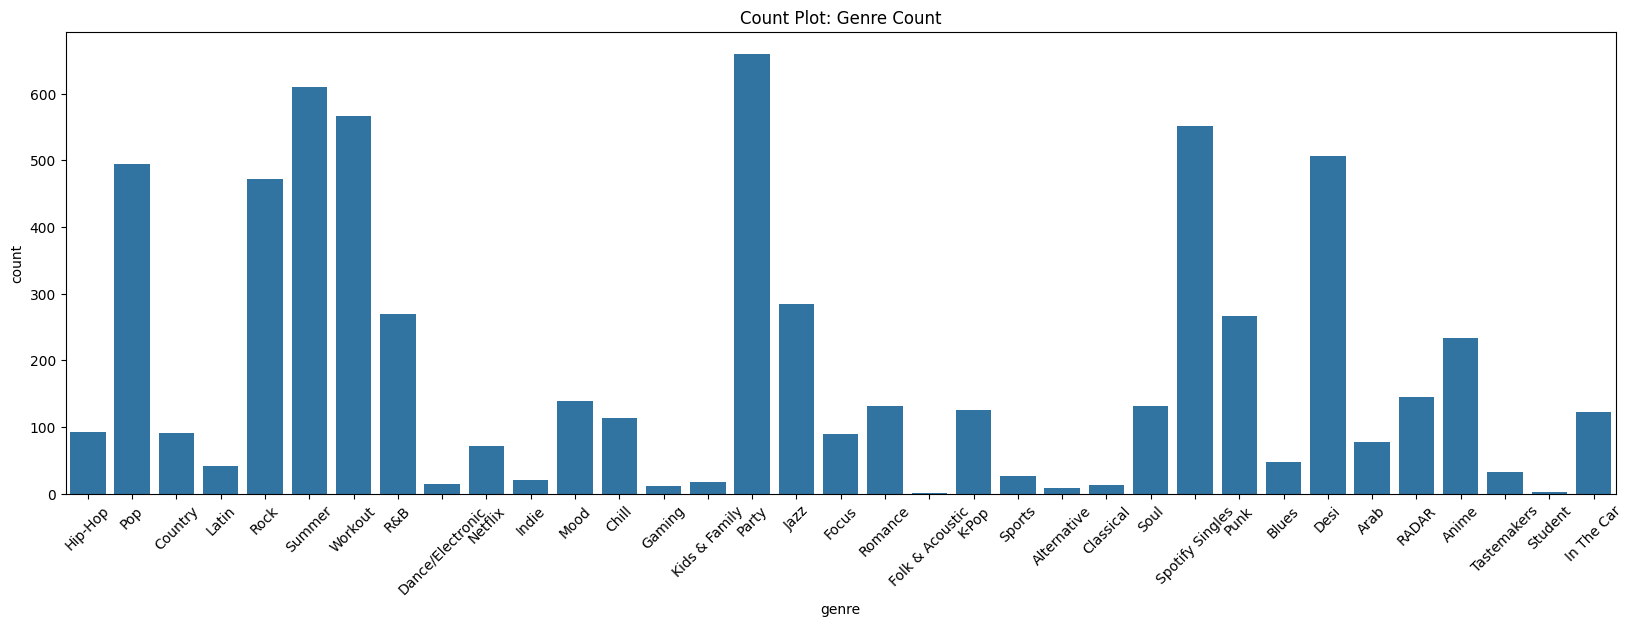

In [ ]:
#1. Count Plot

plt.figure(figsize=(20, 6))
sns.countplot(x='genre', data=df)
plt.xticks(rotation=45)
plt.title('Count Plot: Genre Count')
plt.show()

Text(0.5, 1.0, 'Top 10 Most Popular Artists')

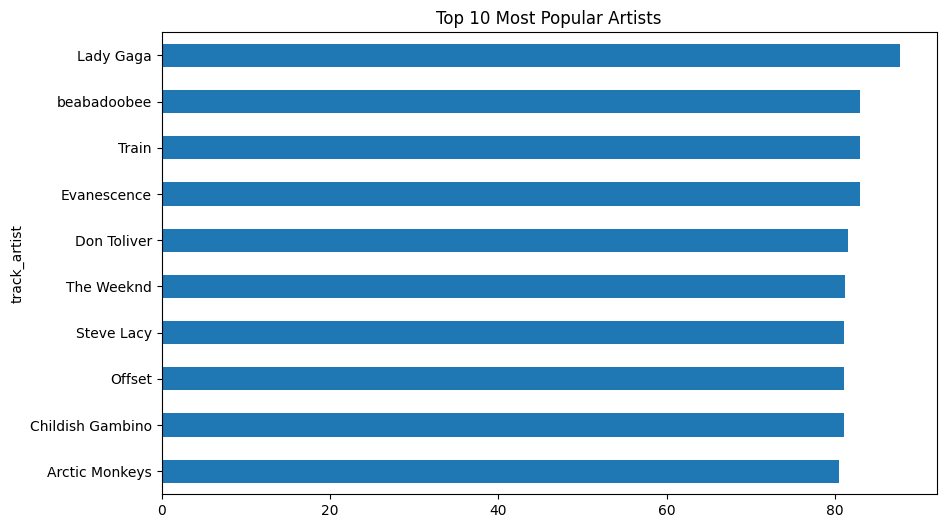

In [ ]:
#2. Bar Plot

top_artists = df.groupby('track_artist')['track_popularity'].mean().nlargest(10)
plt.figure(figsize=(10, 6))
top_artists.sort_values().plot(kind='barh')
plt.title('Top 10 Most Popular Artists')

Text(0.5, 1.0, 'Track Popularity Over the Years')

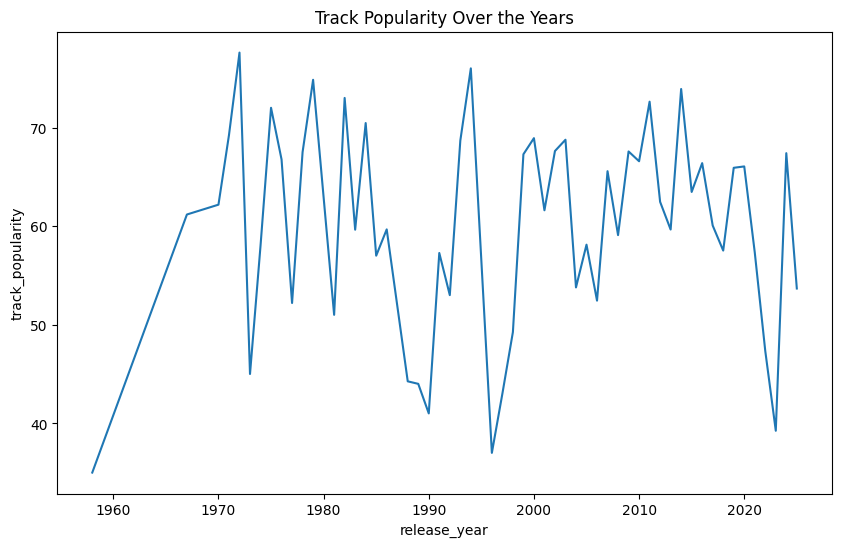

In [ ]:
#3. Line Plot

plt.figure(figsize=(10, 6))
df_yearly = df.groupby('release_year')['track_popularity'].mean().reset_index()
sns.lineplot(x='release_year', y='track_popularity', data=df_yearly, estimator='mean')
plt.title('Track Popularity Over the Years')

Text(0.5, 1.0, 'Genre Popularity')

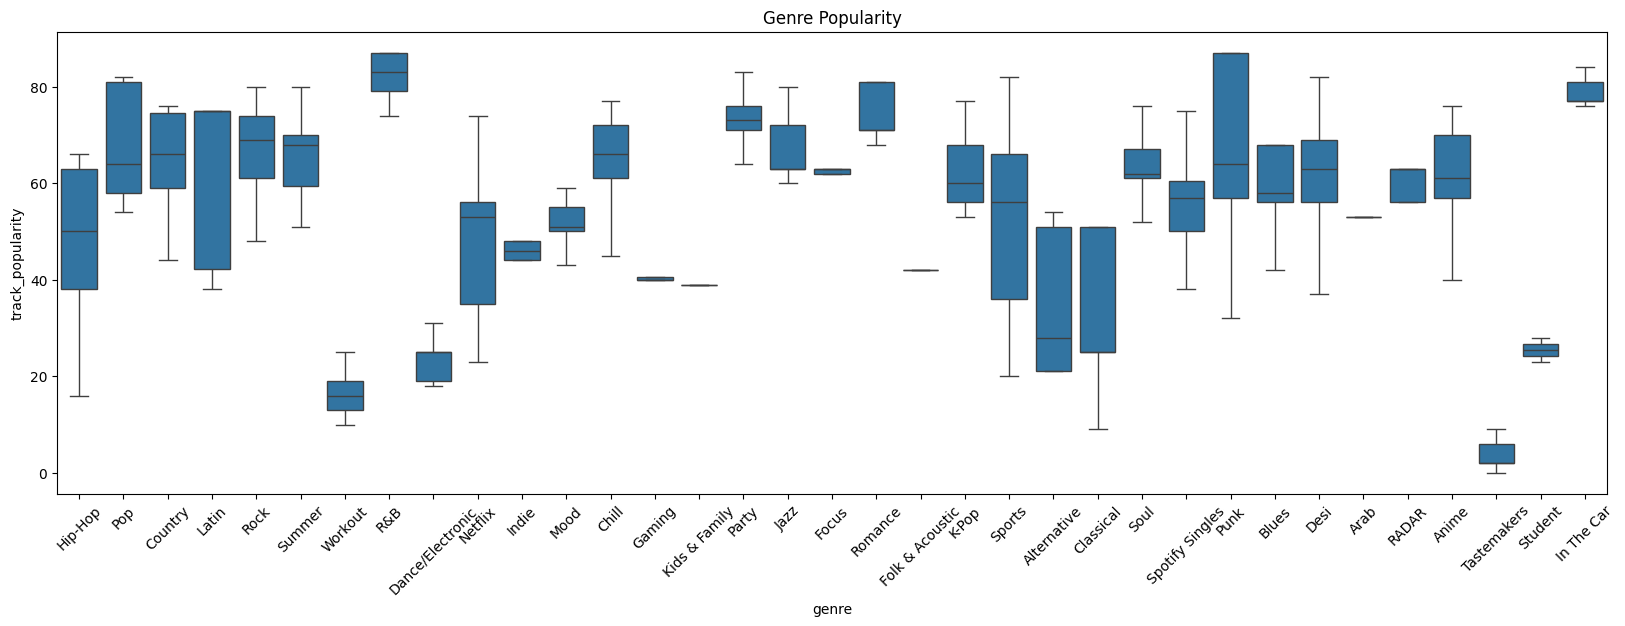

In [ ]:
# 4. Box Plot

plt.figure(figsize=(20, 6))
sns.boxplot(x='genre', y='track_popularity', data=df, showfliers=False)
plt.xticks(rotation=45)
plt.title('Genre Popularity')

Text(0.5, 1.0, 'Distribution of Danceability')

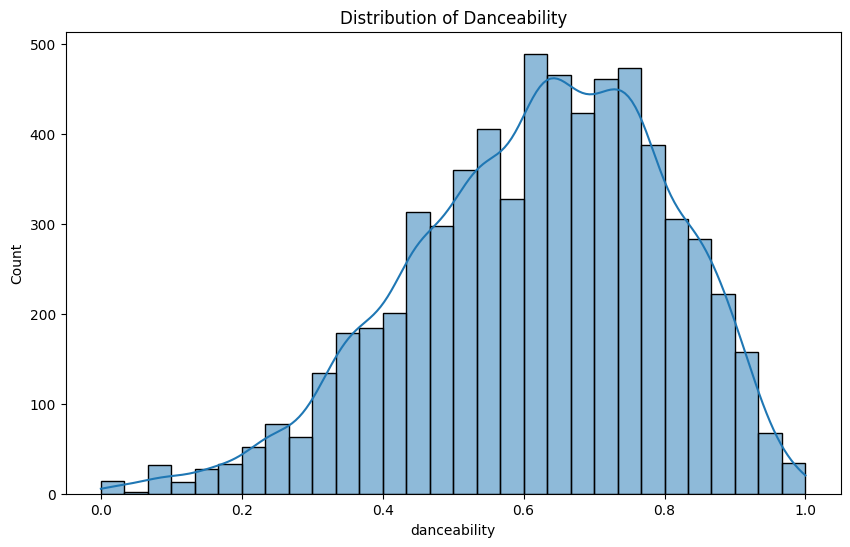

In [ ]:
# 5. Histogram

plt.figure(figsize=(10, 6))
sns.histplot(df['danceability'], bins=30,kde=True)
plt.title('Distribution of Danceability')

Text(0.5, 1.0, 'Energy vs. Danceability')

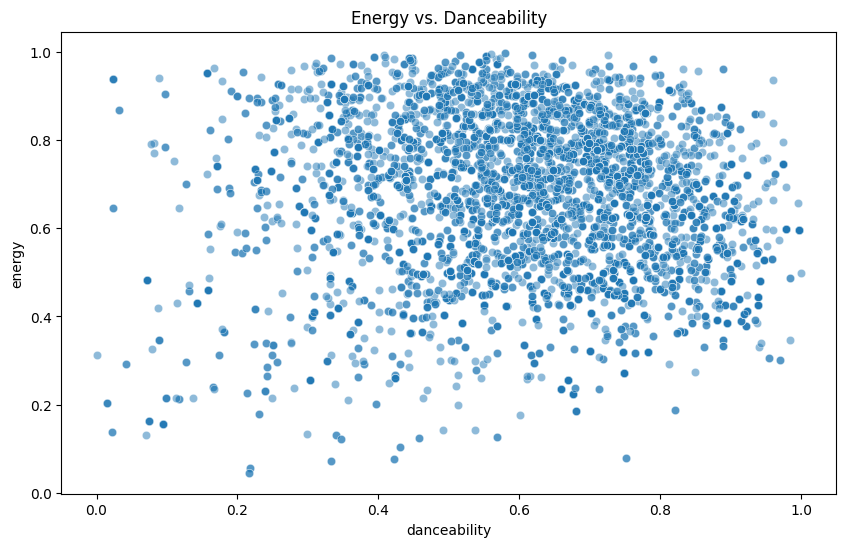

In [ ]:
# 6. Scatterplot

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['danceability'], y=df['energy'], alpha=0.5)
plt.title('Energy vs. Danceability')

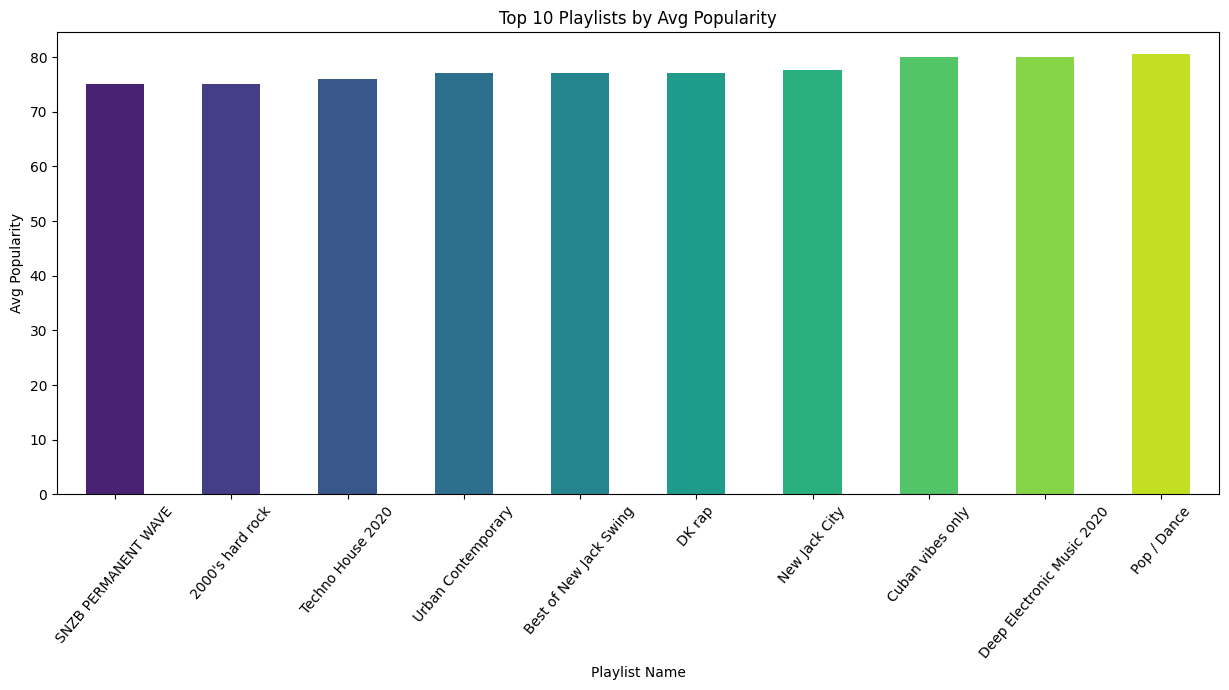

In [ ]:
#7. Bar plot

top_playlists = df.groupby('playlist_name')['track_popularity'].mean().nlargest(10)

shortened_names = {
    'Techno House 2020 👽 Best Collection 👻 Top DJ’s Electronic Music - Deep House - Trance - Tech House - Dance - Electro Pop':
    'Techno House 2020', 'Deep Electronic Music 2020 & Progressive House':'Deep Electronic Music 2020'
}
colors = sns.color_palette("viridis", len(top_playlists))

plt.figure(figsize=(15, 6))
top_playlists.sort_values().plot(kind='bar', color=colors)
plt.xticks(ticks=range(len(top_playlists)),
           labels=[shortened_names.get(name, name) for name in top_playlists.index],rotation = 50)

plt.title('Top 10 Playlists by Avg Popularity')
plt.xlabel('Playlist Name')
plt.ylabel('Avg Popularity')
plt.show()


Text(0.5, 1.0, 'Correlation Heatmap')

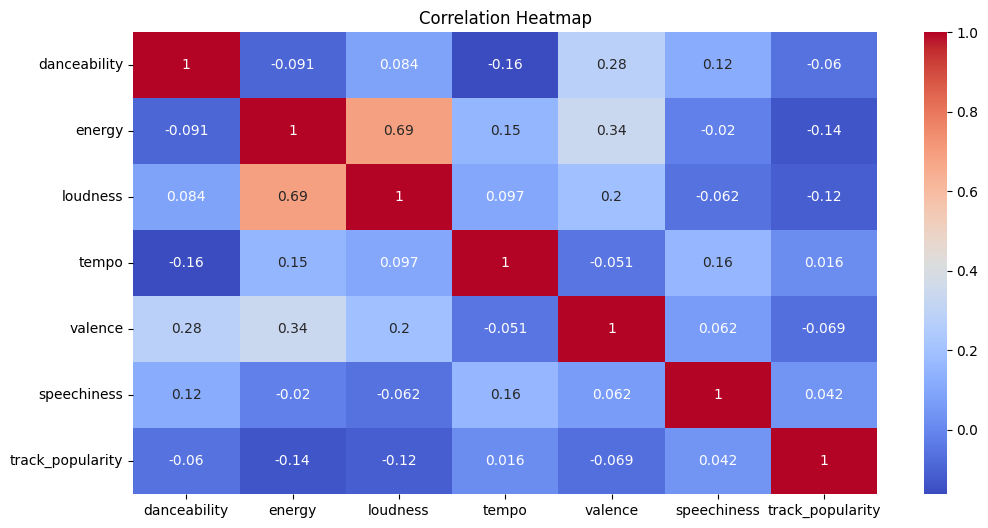

In [ ]:
# 8. Heatmap

plt.figure(figsize=(12, 6))
sns.heatmap(df[['danceability', 'energy', 'loudness', 'tempo', 'valence', 'speechiness','track_popularity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

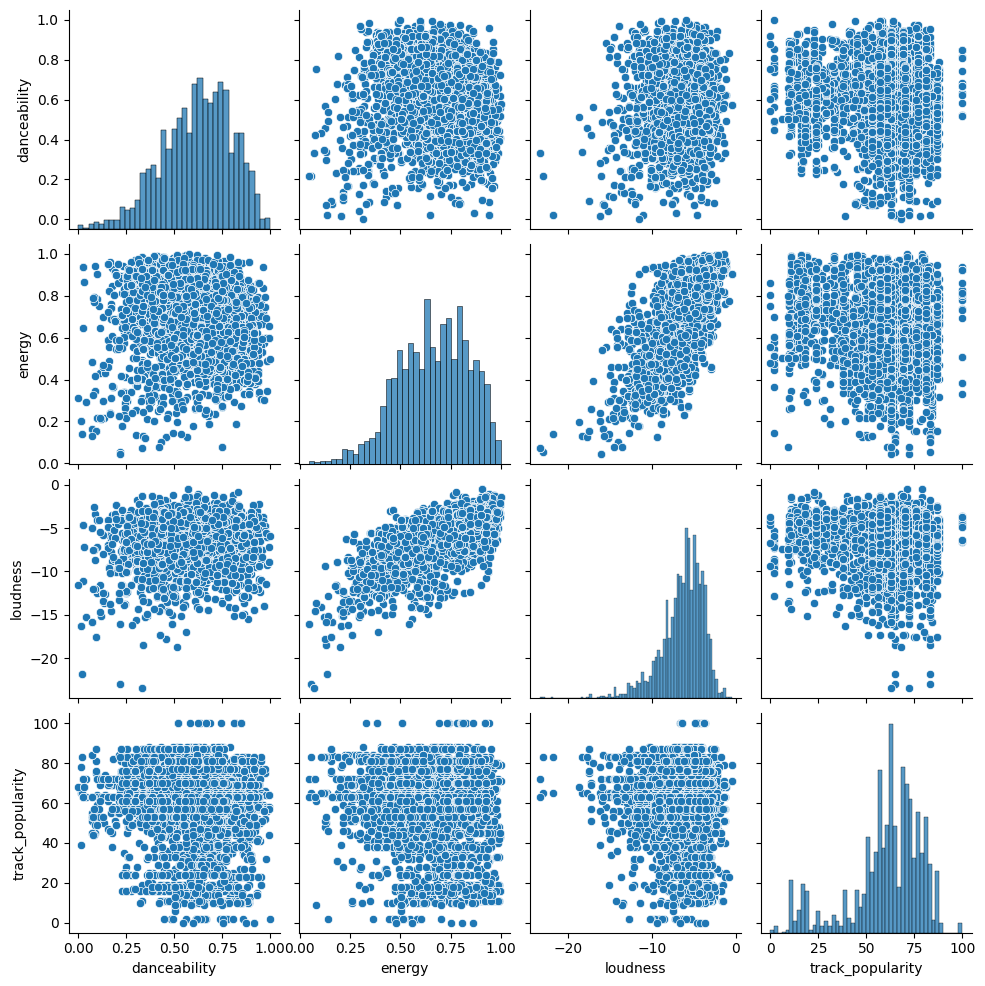

In [ ]:
# 9. Pairplot

sns.pairplot(df[['danceability', 'energy', 'loudness', 'track_popularity']])
plt.show()

Text(0.5, 1.0, 'Energy Levels Across Genres')

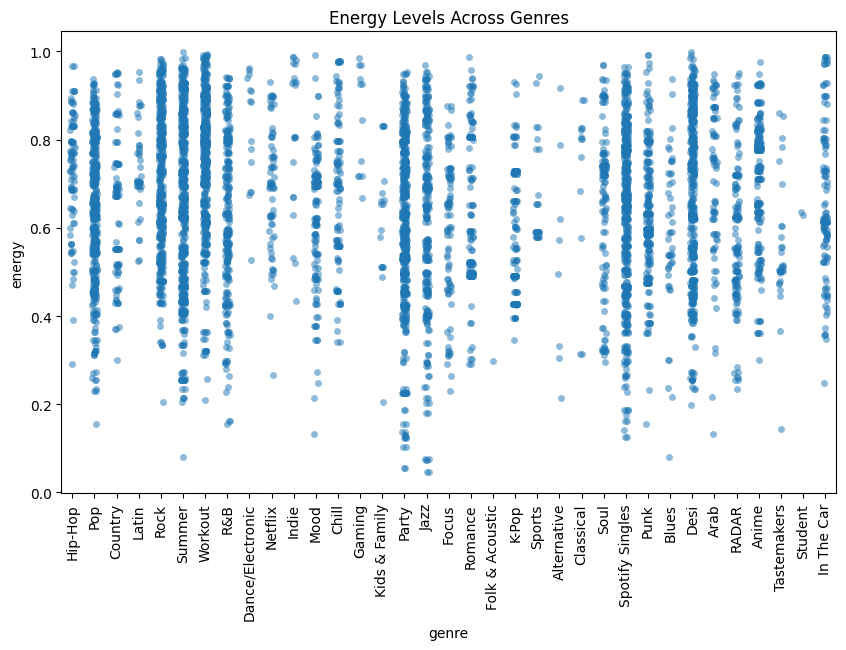

In [ ]:
# 10. Strip plot

plt.figure(figsize=(10, 6))
sns.stripplot(x="genre", y="energy", data=df, alpha=0.5)
plt.xticks(rotation=90)
plt.title("Energy Levels Across Genres")

<ipython-input-71-e66b31cfbc62>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['track_popularity'], shade=True, color="red")


Text(0.5, 1.0, 'Density Plot of Track Popularity')

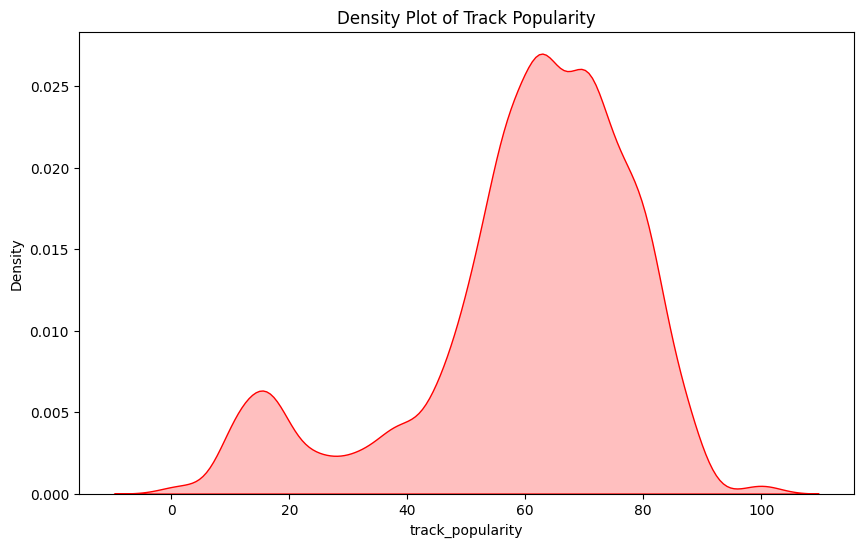

In [ ]:
# 11. Density Plot

plt.figure(figsize=(10, 6))
sns.kdeplot(df['track_popularity'], shade=True, color="red")
plt.title("Density Plot of Track Popularity")

<ipython-input-73-678db85aa02c>:4: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x="genre", y="tempo", data=df, scale="width")


Text(0.5, 1.0, 'Tempo Distribution by Genre')

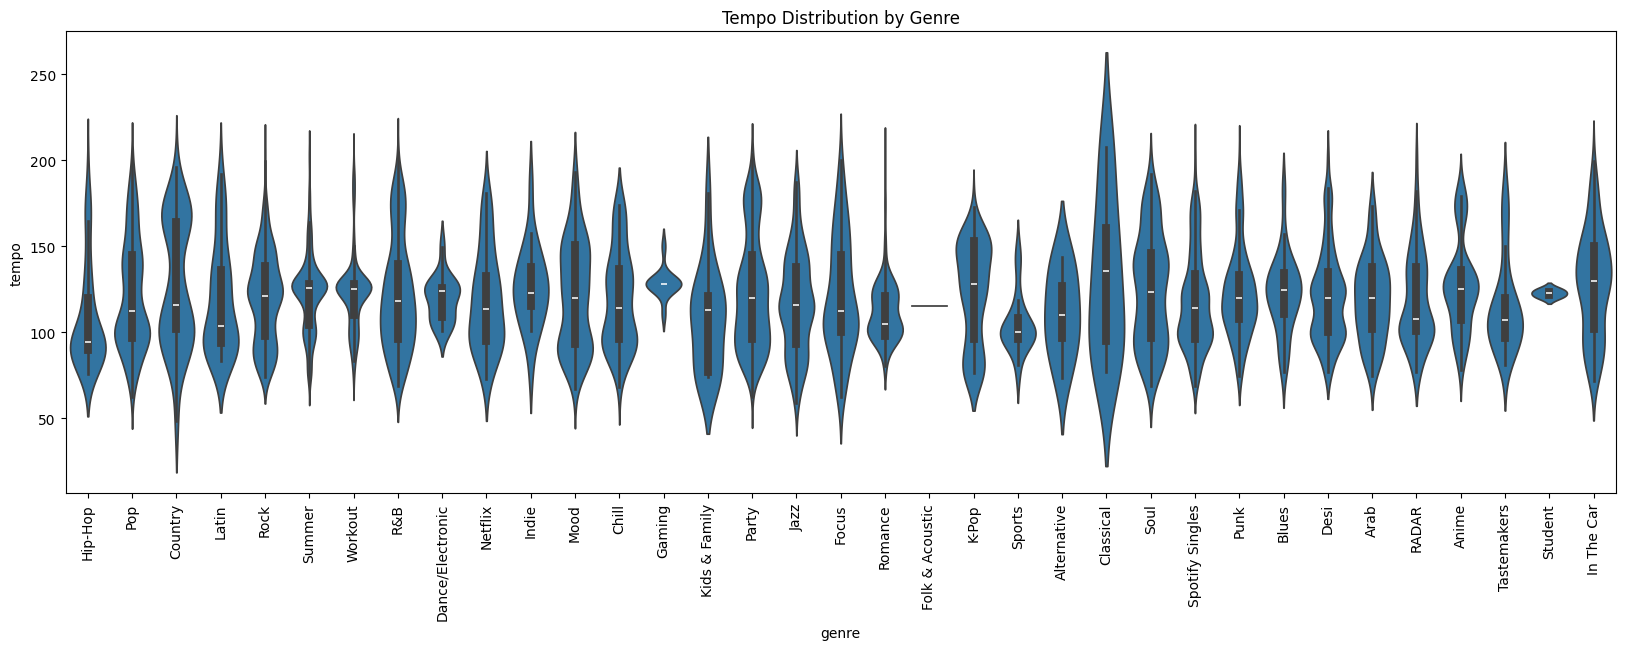

In [ ]:
# 12. Violin Plot

plt.figure(figsize=(20, 6))
sns.violinplot(x="genre", y="tempo", data=df, scale="width")
plt.xticks(rotation=90)
plt.title("Tempo Distribution by Genre")